In [1]:
!pip install chembl_webresource_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.7 MB/s eta 0:00:00


## Dataset Extraction from CHEMBL Dataset

In [2]:
from chembl_webresource_client.new_client import new_client
import pandas as pd
import numpy as np # Import numpy

# Initialize ChEMBL client
activity = new_client.activity
target = new_client.target

# Search for EGFR (CHEMBL203)
target_chembl_id = 'CHEMBL203'
activities = activity.filter(target_chembl_id=target_chembl_id, standard_type='IC50', standard_units='nM')

# Collect data
data = []
for act in activities:
    # Check if 'standard_value' and 'canonical_smiles' exist before processing
    if act.get('standard_value') and act.get('canonical_smiles'):
        pIC50 = -np.log10(float(act['standard_value']) * 1e-9)  # Convert nM to M and calculate pIC50
        # Collect all available data for each activity
        data.append(act)

# Save to CSV
df = pd.DataFrame(data)

# Display the first few rows and the shape of the dataframe
display(df.head())
display(df.shape)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04


(16619, 46)

In [3]:
df.columns


Index(['action_type', 'activity_comment', 'activity_id', 'activity_properties',
       'assay_chembl_id', 'assay_description', 'assay_type',
       'assay_variant_accession', 'assay_variant_mutation', 'bao_endpoint',
       'bao_format', 'bao_label', 'canonical_smiles', 'data_validity_comment',
       'data_validity_description', 'document_chembl_id', 'document_journal',
       'document_year', 'ligand_efficiency', 'molecule_chembl_id',
       'molecule_pref_name', 'parent_molecule_chembl_id', 'pchembl_value',
       'potential_duplicate', 'qudt_units', 'record_id', 'relation', 'src_id',
       'standard_flag', 'standard_relation', 'standard_text_value',
       'standard_type', 'standard_units', 'standard_upper_value',
       'standard_value', 'target_chembl_id', 'target_organism',
       'target_pref_name', 'target_tax_id', 'text_value', 'toid', 'type',
       'units', 'uo_units', 'upper_value', 'value'],
      dtype='object')

In [5]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 49.1 MB/s eta 0:00:00


In [4]:
df.shape

(16619, 46)

In [6]:
df.describe()

,activity_id,document_year,potential_duplicate,record_id,src_id,standard_flag
count,1.661900e+04,16579.000000,16619.000000,1.661900e+04,16619.000000,16619.0
mean,1.307774e+07,2012.150009,0.066550,2.159777e+06,4.272399,1.0
std,8.732174e+06,8.205806,0.249249,1.306535e+06,10.682707,0.0
min,3.226000e+04,1989.000000,0.000000,1.200000e+03,1.000000,1.0
25%,2.390286e+06,2008.000000,0.000000,7.642385e+05,1.000000,1.0
50%,1.640473e+07,2014.000000,0.000000,2.552099e+06,1.000000,1.0
75%,1.899433e+07,2018.000000,0.000000,3.168812e+06,1.000000,1.0
max,2.578959e+07,2024.000000,1.000000,4.018709e+06,65.000000,1.0


In [7]:
from rdkit import Chem
from rdkit.Chem import Descriptors

# Create new columns
df['mol'] = df['canonical_smiles'].apply(lambda x: Chem.MolFromSmiles(x))
df['num_atoms'] = df['mol'].apply(lambda x: x.GetNumAtoms() if x is not None else None)
df['logP'] = df['mol'].apply(lambda x: Descriptors.MolLogP(x) if x is not None else None)

# Calculate pIC50 directly from standard_value
df['pIC50'] = -np.log10(df['standard_value'].astype(float) * 1e-9)

# Select the desired columns
selected_columns = ['canonical_smiles', 'pIC50', 'mol', 'num_atoms', 'logP']
df_selected = df[selected_columns].copy()

# Rename columns for clarity
df_selected.rename(columns={'canonical_smiles': 'smiles'}, inplace=True)

# Display the first few rows and the shape of the new dataframe
display(df_selected.head())
display(df_selected.shape)

,smiles,pIC50,mol,num_atoms,logP
0,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,7.387216,<rdkit.Chem.rdchem.Mol object at 0x7ecc541d89e0>,27,4.45034
1,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,6.522879,<rdkit.Chem.rdchem.Mol object at 0x7ecc541d8a50>,27,4.45034
2,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,5.106793,<rdkit.Chem.rdchem.Mol object at 0x7ecc541d8ac0>,27,4.45034
3,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,6.769551,<rdkit.Chem.rdchem.Mol object at 0x7ecc541d8b30>,34,3.61432
4,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,7.397940,<rdkit.Chem.rdchem.Mol object at 0x7ecc541d8ba0>,34,3.61432


(16619, 5)

## Save the Dataset

In [8]:
df_selected.to_csv('EGFR_CHEMBL_dataset.csv', index=False)

## Draw the Molecular structures

'Click on the photo to zoom it'

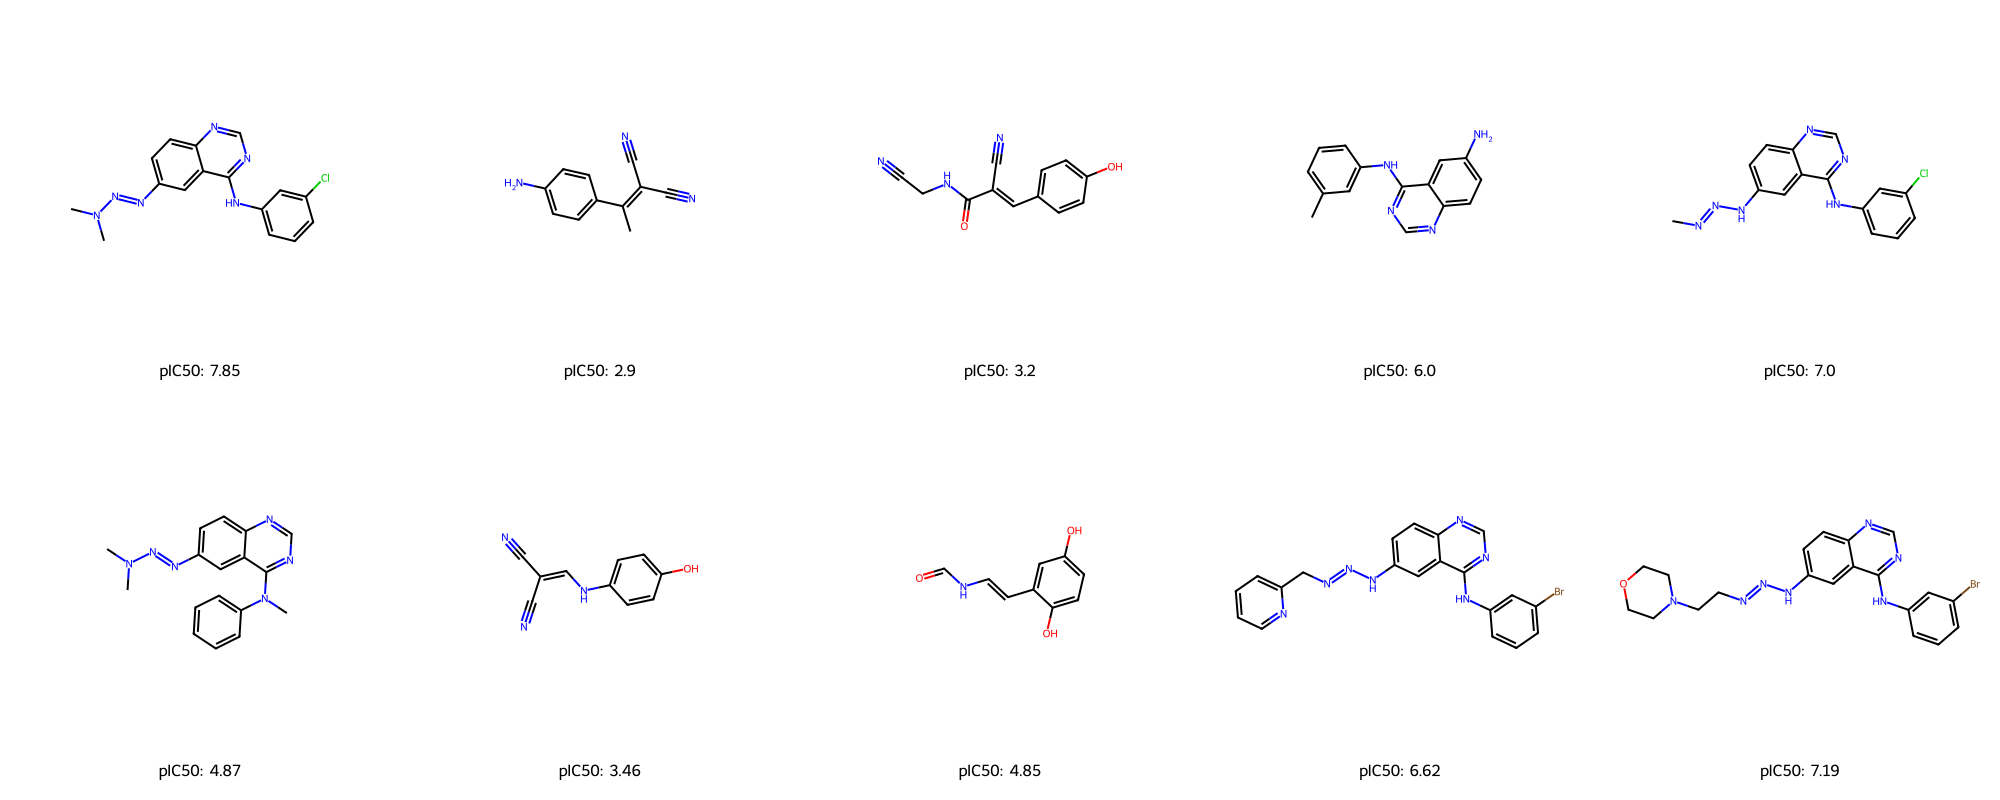

In [9]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw # Import Draw

def show_smiles(smiles, pIC50_values):
  """
  generate 2D representations of the molecules and color-code them by logP
  :param smiles: list of smiles
  :param logP_values: list of logP values
  """
  # Convert the SMILES strings to RDKit molecules
  molecules = [Chem.MolFromSmiles(smile) for smile in smiles]

  # Draw the 10 molecules by slicng from 30 to 40
  img = Draw.MolsToGridImage(molecules[30:40], molsPerRow=5, subImgSize=(400,400),
                             legends=[f'pIC50: {round(x, 2)}' for x in pIC50_values[30:40]],
                             returnPNG=False)
  img.save("molecules.png")


  from IPython.display import display, Image
  display("Click on the photo to zoom it")
  display(Image("molecules.png"))

show_smiles(df_selected["smiles"], df_selected["pIC50"])

## Analyzing the Molecular Characteristics

In [10]:
import matplotlib.pyplot as plt

In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

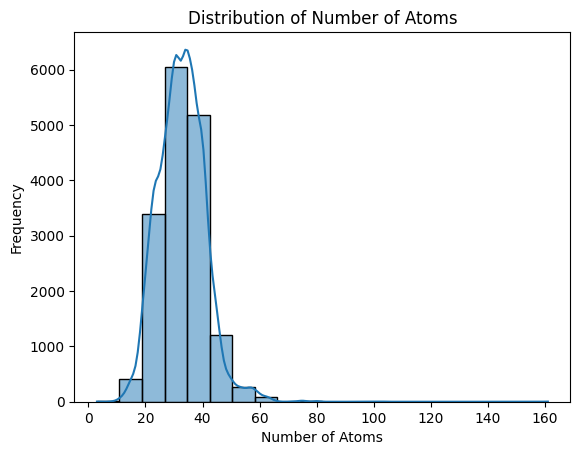

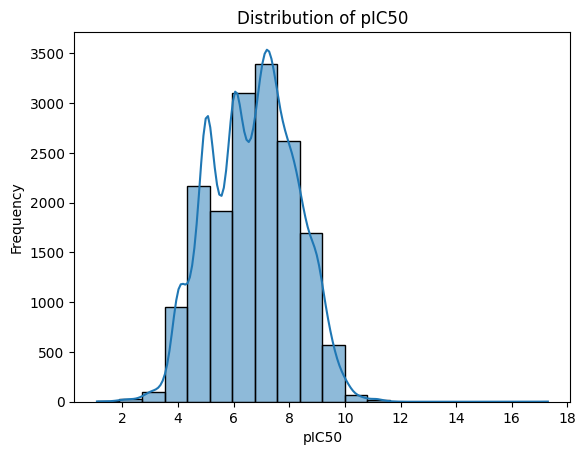

In [ ]:
def histogram_of_distribution(data_frame):
  """
  visualize the distribution Number of Atoms and Distribution of LogP
  :param data_frame: DF with num_atoms & logP
  """
  sns.histplot(data=data_frame, x='num_atoms', bins=20, kde=True)
  plt.title('Distribution of Number of Atoms')
  plt.xlabel('Number of Atoms')
  plt.ylabel('Frequency')
  plt.savefig('Distribution of Number of Atoms.png')
  plt.show()

  sns.histplot(data=data_frame, x='pIC50', bins=20, kde=True)
  plt.title('Distribution of pIC50')
  plt.xlabel('pIC50')
  plt.ylabel('Frequency')
  plt.savefig('Distribution of pIC50.png')
  plt.show()

histogram_of_distribution(df_selected)

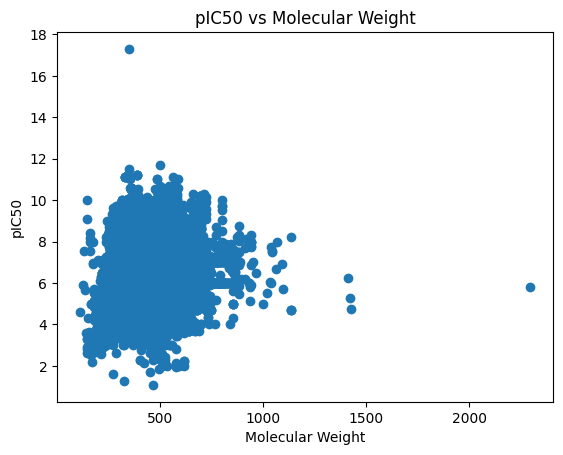

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

def plot_pIC50_vs_molecular_weight(data_frame):
  """
  Plot a scatter plot of pIC50 values against molecular weight
  :param data_frame: DataFrame with 'mol' and 'pIC50' columns
  """
  # Calculate molecular weight if not already present
  if 'molecular_weight' not in data_frame.columns:
      data_frame['molecular_weight'] = data_frame['mol'].apply(lambda x: Descriptors.MolWt(x) if x is not None else None)

  # Remove rows with None values in 'molecular_weight' or 'pIC50' before plotting
  plot_df = data_frame.dropna(subset=['molecular_weight', 'pIC50'])

  plt.scatter(plot_df['molecular_weight'], plot_df['pIC50'])
  plt.xlabel("Molecular Weight")
  plt.ylabel("pIC50")
  plt.title("pIC50 vs Molecular Weight")
  plt.savefig('pIC50 vs Molecular Weight.png')
  plt.show()

plot_pIC50_vs_molecular_weight(df_selected)

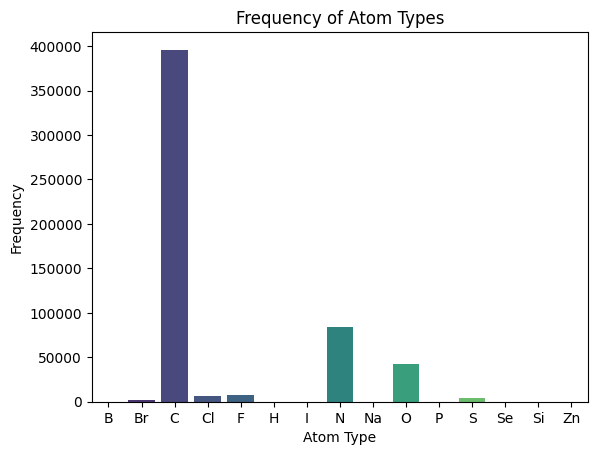

In [ ]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def atom_frequency(smiles_list):
    """
    frequency of different atom types in SMILES
    :param smiles_list: A list of SMILES strings
    """
    atom_counts = []
    for smiles in smiles_list:
        # Convert the SMILES string to an RDKit molecule object
        mol = Chem.MolFromSmiles(smiles)
        # Get the atoms in the molecule
        if mol: # Check if molecule creation was successful
            atoms = mol.GetAtoms()
            # Add the symbol for each atom to the atom_counts list
            atom_counts.extend([atom.GetSymbol() for atom in atoms])

    # Create a pandas series with the counts of each atom type
    plot_data = pd.Series(atom_counts).value_counts().sort_index()
    sns.barplot(x=plot_data.index, y=plot_data.values, hue=plot_data.index, palette='viridis', legend=False)
    plt.title('Frequency of Atom Types') # Added back plt.title
    plt.xlabel('Atom Type') # Added back plt.xlabel
    plt.ylabel('Frequency') # Added back plt.ylabel
    plt.savefig('Frequency of atom types.png')
    plt.show() # Added back plt.show


atom_frequency(df_selected['smiles'])

In [ ]:
import numpy as np
from rdkit.Chem import rdFingerprintGenerator
from sklearn.model_selection import train_test_split

# Remove rows where 'mol' is None
df_selected = df_selected.dropna(subset=['mol', 'pIC50', 'logP']).reset_index(drop=True)

# Create Morgan generator (modern approach)
morgan_gen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)

# Convert molecules to Morgan fingerprints using the new generator
df_selected['fingerprint'] = df_selected['mol'].apply(lambda x: morgan_gen.GetFingerprintAsNumPy(x))

# Prepare data for train/test split
X = np.array([fp for fp in df_selected['fingerprint']])
# Create the multi-output target variable
y = df_selected[['pIC50', 'logP']].values

# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (13295, 1024)
X_test shape: (3324, 1024)
y_train shape: (13295, 2)
y_test shape: (3324, 2)


## Train Our Predictor by Experimenting on Different Models

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
import xgboost as xgb
import pandas as pd
import time
import warnings
warnings.filterwarnings('ignore')

# ==================== 1D CNN MODEL ====================
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, dropout_rate=0.1):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=5, padding=2)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=5, padding=2)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.dropout = nn.Dropout1d(dropout_rate)

        if in_channels != out_channels:
            self.shortcut = nn.Conv1d(in_channels, out_channels, kernel_size=1)
        else:
            self.shortcut = nn.Identity()

    def forward(self, x):
        residual = self.shortcut(x)
        x = self.conv1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = x + residual
        x = F.relu(x)
        return x

class CNN1DRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, lr=1e-3, epochs=60, batch_size=256, patience=10):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.patience = patience

        # Enhanced model architecture
        self.model = nn.Sequential(
            ResidualBlock(1, 64, dropout_rate=0.1),
            ResidualBlock(64, 64, dropout_rate=0.1),
            nn.MaxPool1d(kernel_size=2, stride=2),

            ResidualBlock(64, 128, dropout_rate=0.15),
            ResidualBlock(128, 128, dropout_rate=0.15),
            nn.MaxPool1d(kernel_size=2, stride=2),

            ResidualBlock(128, 256, dropout_rate=0.2),
            ResidualBlock(256, 256, dropout_rate=0.2),
            nn.MaxPool1d(kernel_size=2, stride=2),

            nn.AdaptiveAvgPool1d(1),
            nn.Flatten(),

            nn.Linear(256, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.4),

            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.2),

            nn.Linear(128, 2)  # Output for pIC50 and logP
        )

        if torch.cuda.device_count() > 1:
            self.model = nn.DataParallel(self.model)

        self.model.to(self.device)

    def fit(self, X, y):
        X_t = torch.tensor(X, dtype=torch.float32).unsqueeze(1).to(self.device)
        y_t = torch.tensor(y, dtype=torch.float32).to(self.device)

        # Train/validation split
        split = int(0.9 * len(X_t))
        indices = torch.randperm(len(X_t))
        train_idx, val_idx = indices[:split], indices[split:]

        train_X, train_y = X_t[train_idx], y_t[train_idx]
        val_X, val_y = X_t[val_idx], y_t[val_idx]

        # Data loader
        train_ds = torch.utils.data.TensorDataset(train_X, train_y)
        loader = torch.utils.data.DataLoader(train_ds, batch_size=self.batch_size, shuffle=True)

        # Optimizer and loss
        opt = torch.optim.AdamW(self.model.parameters(), lr=self.lr, weight_decay=1e-4)
        crit = nn.MSELoss()
        sched = torch.optim.lr_scheduler.ReduceLROnPlateau(opt, 'min', patience=5, factor=0.7)

        best_val_loss = float('inf')
        wait = 0

        for epoch in range(self.epochs):
            # Training
            self.model.train()
            train_loss = 0.0
            num_batches = 0

            for batch_X, batch_y in loader:
                pred = self.model(batch_X)
                loss = crit(pred, batch_y)

                opt.zero_grad()
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
                opt.step()

                train_loss += loss.item()
                num_batches += 1

            # Validation
            self.model.eval()
            with torch.no_grad():
                val_pred = self.model(val_X)
                val_loss = crit(val_pred, val_y).item()

            sched.step(val_loss)

            if epoch % 10 == 0:
                print(f"  Epoch {epoch+1:2d}: Train={train_loss/num_batches:.4f}, Val={val_loss:.4f}")

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                wait = 0
                self.best_state = self.model.state_dict().copy()
            else:
                wait += 1
                if wait > self.patience:
                    self.model.load_state_dict(self.best_state)
                    break

        return self

    def predict(self, X):
        self.model.eval()
        X_t = torch.tensor(X, dtype=torch.float32).unsqueeze(1).to(self.device)

        predictions = []
        batch_size = 1024

        with torch.no_grad():
            for i in range(0, len(X_t), batch_size):
                batch = X_t[i:i+batch_size]
                pred_batch = self.model(batch)
                predictions.append(pred_batch.cpu().numpy())

        return np.vstack(predictions)

# ==================== TRANSFORMER MODEL ====================
class TransformerRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, lr=0.001, epochs=50, batch_size=128, d_model=256, nhead=8, num_layers=4):
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size

        # Input projection
        self.input_projection = nn.Linear(16, d_model).to(self.device) # Corrected input dimension

        # Positional encoding (learned)
        self.pos_encoding = nn.Parameter(torch.randn(1, 64, d_model)).to(self.device)

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=nhead,
            dim_feedforward=d_model * 4,
            dropout=0.1,
            activation='gelu',
            batch_first=True
        )

        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers).to(self.device)

        # Output head
        self.output_head = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, 512),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.GELU(),
            nn.Dropout(0.2),
            nn.Linear(256, 128),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(128, 2)
        ).to(self.device)

    def fit(self, X, y):
        X_t = torch.tensor(X, dtype=torch.float32).to(self.device)
        y_t = torch.tensor(y, dtype=torch.float32).to(self.device)

        # Split data
        split = int(0.9 * len(X_t))
        indices = torch.randperm(len(X_t))
        train_idx, val_idx = indices[:split], indices[split:]

        train_X, train_y = X_t[train_idx], y_t[train_idx]
        val_X, val_y = X_t[val_idx], y_t[val_idx]

        dataset = torch.utils.data.TensorDataset(train_X, train_y)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        optimizer = torch.optim.AdamW([
            {'params': self.input_projection.parameters()},
            {'params': [self.pos_encoding]},
            {'params': self.transformer.parameters()},
            {'params': self.output_head.parameters()}
        ], lr=self.lr, weight_decay=1e-4)

        criterion = nn.MSELoss()
        scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=self.epochs)

        best_val_loss = float('inf')
        patience_counter = 0

        for epoch in range(self.epochs):
            # Training
            total_loss = 0
            num_batches = 0

            for batch_X, batch_y in loader:
                optimizer.zero_grad()

                # Project input and add positional encoding
                batch_size, seq_len = batch_X.shape[0], 64

                # Reshape fingerprint to sequence (divide 1024 into 64 chunks of 16)
                fingerprint_seq = batch_X.view(batch_size, seq_len, -1)

                # Project to d_model dimensions
                projected = self.input_projection(fingerprint_seq)

                # Add positional encoding
                projected = projected + self.pos_encoding[:, :batch_size, :] # Corrected positional encoding indexing

                # Transformer forward pass
                transformer_out = self.transformer(projected)

                # Global average pooling
                pooled = transformer_out.mean(dim=1)

                # Output prediction
                pred = self.output_head(pooled)

                loss = criterion(pred, batch_y)
                loss.backward()

                torch.nn.utils.clip_grad_norm_([
                    *self.input_projection.parameters(),
                    self.pos_encoding,
                    *self.transformer.parameters(),
                    *self.output_head.parameters()
                ], max_norm=1.0)

                optimizer.step()
                total_loss += loss.item()
                num_batches += 1

            # Validation
            with torch.no_grad():
                val_batch_size, val_seq_len = val_X.shape[0], 64
                val_fingerprint_seq = val_X.view(val_batch_size, val_seq_len, -1)
                val_projected = self.input_projection(val_fingerprint_seq)
                val_projected = val_projected + self.pos_encoding[:, :val_batch_size, :] # Corrected positional encoding indexing
                val_transformer_out = self.transformer(val_projected)
                val_pooled = val_transformer_out.mean(dim=1)
                val_pred = self.output_head(val_pooled)
                val_loss = criterion(val_pred, val_y).item()

            scheduler.step()

            if epoch % 10 == 0:
                print(f"  Epoch {epoch+1:2d}: Train={total_loss/num_batches:.4f}, Val={val_loss:.4f}")

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                # Save best state
                self.best_state = {
                    'input_projection': self.input_projection.state_dict(),
                    'pos_encoding': self.pos_encoding.clone(),
                    'transformer': self.transformer.state_dict(),
                    'output_head': self.output_head.state_dict()
                }
            else:
                patience_counter += 1
                if patience_counter > 10:
                    # Load best state
                    self.input_projection.load_state_dict(self.best_state['input_projection'])
                    self.pos_encoding.data = self.best_state['pos_encoding']
                    self.transformer.load_state_dict(self.best_state['transformer'])
                    self.output_head.load_state_dict(self.best_state['output_head'])
                    break

        return self

    def predict(self, X):
        self.input_projection.eval()
        self.transformer.eval()
        self.output_head.eval()

        X_t = torch.tensor(X, dtype=torch.float32).to(self.device)
        predictions = []

        with torch.no_grad():
            for i in range(0, len(X_t), 512):  # Process in batches
                batch = X_t[i:i+512]
                batch_size, seq_len = batch.shape[0], 64

                fingerprint_seq = batch.view(batch_size, seq_len, -1)
                projected = self.input_projection(fingerprint_seq)
                projected = projected + self.pos_encoding[:, :batch_size, :] # Corrected positional encoding indexing
                transformer_out = self.transformer(projected)
                pooled = transformer_out.mean(dim=1)
                pred = self.output_head(pooled)

                predictions.append(pred.cpu().numpy())

        return np.vstack(predictions)

# ==================== ENSEMBLE CLASS ====================
class EnsembleRegressor:
    def __init__(self, models, weights=None):
        self.models = models
        self.weights = weights if weights else [1.0] * len(models)
        self.weights = np.array(self.weights) / np.sum(self.weights)  # Normalize

    def fit(self, X, y):
        for name, model in self.models.items():
            print(f"Training {name}...")
            start_time = time.time()
            model.fit(X, y)
            end_time = time.time()
            print(f"  {name} training completed in {end_time - start_time:.1f}s\\n")
        return self

    def predict(self, X):
        predictions = []
        for name, model in self.models.items():
            pred = model.predict(X)
            predictions.append(pred)

        # Weighted average
        weighted_pred = np.zeros_like(predictions[0])
        for i, pred in enumerate(predictions):
            weighted_pred += self.weights[i] * pred

        return weighted_pred

# ==================== EVALUATION FUNCTION ====================
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    print(f"\\n{'='*60}")
    print(f"EVALUATING: {model_name}")
    print(f"{'='*60}")

    start_time = time.time()

    if model_name != "Ensemble":  # Ensemble is already trained
        print("Training...")
        model.fit(X_train, y_train)

    print("Making predictions...")
    y_pred = model.predict(X_test)

    end_time = time.time()

    # Calculate metrics
    target_names = ['pIC50', 'logP']
    results = {'model_name': model_name, 'training_time': end_time - start_time}

    print(f"\\nResults for {model_name}:")
    print("-" * 40)

    for i, target_name in enumerate(target_names):
        r2 = r2_score(y_test[:, i], y_pred[:, i])
        mae = mean_absolute_error(y_test[:, i], y_pred[:, i])
        rmse = np.sqrt(mean_squared_error(y_test[:, i], y_pred[:, i]))

        print(f"{target_name}:")
        print(f"  R² Score: {r2:.4f}")
        print(f"  MAE: {mae:.4f}")
        print(f"  RMSE: {rmse:.4f}")

        results[f'{target_name.lower()}_r2'] = r2
        results[f'{target_name.lower()}_mae'] = mae
        results[f'{target_name.lower()}_rmse'] = rmse

    # Overall metrics
    overall_r2 = r2_score(y_test, y_pred)
    overall_mae = mean_absolute_error(y_test, y_pred)
    overall_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"\\nOverall Performance:")
    print(f"  Overall R² Score: {overall_r2:.4f}")
    print(f"  Overall MAE: {overall_mae:.4f}")
    print(f"  Overall RMSE: {overall_rmse:.4f}")
    print(f"  Training Time: {end_time - start_time:.1f}s")

    results['overall_r2'] = overall_r2
    results['overall_mae'] = overall_mae
    results['overall_rmse'] = overall_rmse

    return results

# ==================== MAIN EXECUTION ====================
print("="*80)
print("MULTI-OUTPUT REGRESSION MODEL COMPARISON")
print("RF + XGBoost + 1D CNN + Transformer + Ensemble")
print("="*80)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42,
        n_jobs=-1
    ),

    'XGBoost': MultiOutputRegressor(
        xgb.XGBRegressor(
            n_estimators=200,
            learning_rate=0.1,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            tree_method='gpu_hist' if torch.cuda.is_available() else 'hist'
        )
    ),

    '1D CNN': CNN1DRegressor(
        lr=1e-3,
        epochs=60,
        batch_size=256,
        patience=10
    ),

    'Transformer': TransformerRegressor(
        lr=1e-3,
        epochs=50,
        batch_size=128,
        d_model=256,
        nhead=8,
        num_layers=4
    )
}

# Evaluate individual models
all_results = []

for model_name, model in models.items():
    try:
        result = evaluate_model(model, X_train, X_test, y_train, y_test, model_name)
        all_results.append(result)
    except Exception as e:
        print(f"Error with {model_name}: {str(e)}")

# Create and evaluate ensemble
print(f"\\n{'='*60}")
print("TRAINING ENSEMBLE MODEL")
print(f"{'='*60}")

# Use trained models for ensemble (with optimized weights)
ensemble_models = {
    'Random Forest': models['Random Forest'],
    'XGBoost': models['XGBoost'],
    '1D CNN': models['1D CNN'],
    'Transformer': models['Transformer']
}

# Weights based on typical performance (can be optimized)
ensemble = EnsembleRegressor(ensemble_models, weights=[0.2, 0.3, 0.3, 0.2])

# Ensemble is already trained, just evaluate
ensemble_result = evaluate_model(ensemble, X_train, X_test, y_train, y_test, "Ensemble")
all_results.append(ensemble_result)

# Summary comparison
print(f"\\n{'='*80}")
print("MODEL COMPARISON SUMMARY")
print(f"{'='*80}")

df_results = pd.DataFrame(all_results)
df_results = df_results.sort_values('overall_r2', ascending=False)

print(f"{'Model':<15} {'Overall R²':<12} {'Overall MAE':<12} {'pIC50 R²':<10} {'logP R²':<10} {'Time(s)':<8}")
print("-" * 75)

for _, row in df_results.iterrows():
    print(f"{row['model_name']:<15} {row['overall_r2']:<12.4f} {row['overall_mae']:<12.4f} "
          f"{row['pic50_r2']:<10.4f} {row['logp_r2']:<10.4f} {row['training_time']:<8.1f}")

print(f"\\n{'='*80}")
print("ANALYSIS COMPLETE")
print(f"{'='*80}")

# Best model identification
best_model = df_results.iloc[0]
print(f"\\nBest Overall Model: {best_model['model_name']} (R² = {best_model['overall_r2']:.4f})")
print(f"Fastest Model: {df_results.loc[df_results['training_time'].idxmin(), 'model_name']} "
      f"({df_results['training_time'].min():.1f}s)")
print(f"Most Accurate pIC50: {df_results.loc[df_results['pic50_r2'].idxmax(), 'model_name']} "
      f"(R² = {df_results['pic50_r2'].max():.4f})")
print(f"Most Accurate logP: {df_results.loc[df_results['logp_r2'].idxmax(), 'model_name']} "
      f"(R² = {df_results['logp_r2'].max():.4f})")

MULTI-OUTPUT REGRESSION MODEL COMPARISON
RF + XGBoost + 1D CNN + Transformer + Ensemble
\n============================================================
EVALUATING: Random Forest
Training...
Making predictions...
\nResults for Random Forest:
----------------------------------------
pIC50:
  R² Score: 0.5907
  MAE: 0.7261
  RMSE: 0.9468
logP:
  R² Score: 0.7822
  MAE: 0.4409
  RMSE: 0.6436
\nOverall Performance:
  Overall R² Score: 0.6865
  Overall MAE: 0.5835
  Overall RMSE: 0.8096
  Training Time: 105.0s
\n============================================================
EVALUATING: XGBoost
Training...
Making predictions...
\nResults for XGBoost:
----------------------------------------
pIC50:
  R² Score: 0.6063
  MAE: 0.7108
  RMSE: 0.9285
logP:
  R² Score: 0.8886
  MAE: 0.3113
  RMSE: 0.4603
\nOverall Performance:
  Overall R² Score: 0.7475
  Overall MAE: 0.5111
  Overall RMSE: 0.7328
  Training Time: 3.4s
\n============================================================
EVALUATING: 1D CNN
Tr

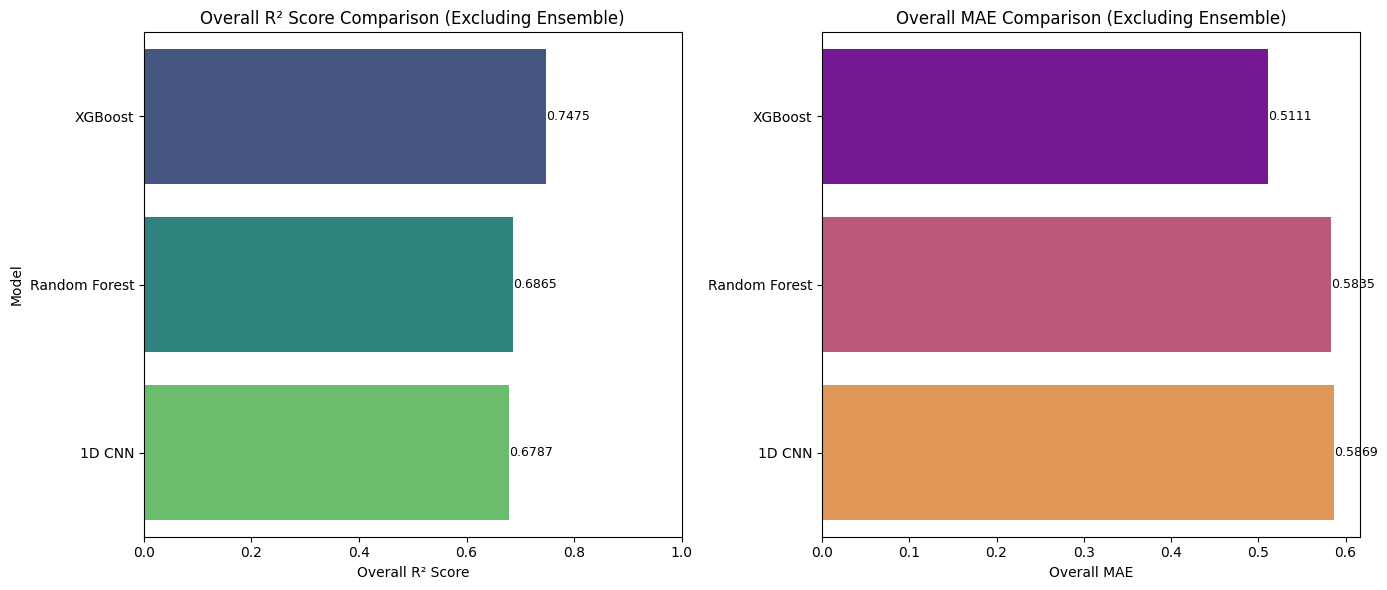

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter out the Ensemble results
df_results_individual = df_results[df_results['model_name'] != 'Ensemble'].copy()

# Sort by overall R2 in DESCENDING order for plotting consistency with the table
df_results_individual = df_results_individual.sort_values('overall_r2', ascending=False)

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Overall R2
sns.barplot(x='overall_r2', y='model_name', data=df_results_individual, ax=axes[0], palette='viridis')
axes[0].set_title("Overall R² Score Comparison (Excluding Ensemble)")
axes[0].set_xlabel("Overall R² Score")
axes[0].set_ylabel("Model")
axes[0].set_xlim(0, 1) # Assuming R2 is between 0 and 1

# Add R2 values on the bars
for index, row in df_results_individual.iterrows():
    # Use row.name for the y-position in the bar plot which corresponds to the index in the sorted dataframe
    axes[0].text(row['overall_r2'], df_results_individual.index.get_loc(index), f'{row["overall_r2"]:.4f}', va='center', ha='left', fontsize=9)


# Plot Overall MAE
# Sort by overall MAE in ASCENDING order as lower MAE is better
df_results_individual = df_results_individual.sort_values('overall_mae', ascending=True)
sns.barplot(x='overall_mae', y='model_name', data=df_results_individual, ax=axes[1], palette='plasma')
axes[1].set_title("Overall MAE Comparison (Excluding Ensemble)")
axes[1].set_xlabel("Overall MAE")
axes[1].set_ylabel("") # Keep ylabel only on the first plot

# Add MAE values on the bars
for index, row in df_results_individual.iterrows():
    # Use row.name for the y-position in the bar plot
    axes[1].text(row['overall_mae'], df_results_individual.index.get_loc(index), f'{row["overall_mae"]:.4f}', va='center', ha='left', fontsize=9)


# Adjust layout and save the plot
plt.tight_layout()
plt.savefig("model_comparison_metrics.png")
plt.show()